# Basic Imports

In [1]:
import pandas as pd
import numpy as np
import os
import operator
import statistics
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
current_path = os.getcwd()
root_path=current_path.replace('\\f_classif','')

In [3]:
mixed_df=pd.read_csv(root_path+"\molecules.csv",sep="\t"); mixed_df.head()

,m_name,n_atoms_without_Hydrogen,n_atoms_with_Hydrogen,m_weight,m_avg_weigth,m_weigth_without_Hydrogen,n_valence_electrons,n_aliphatic_carbocycles,n_aliphatic_heterocycles,n_aliphatic_rings,...,n_HOH,n_O,n_briged_head_atoms,n_atoms_stereo_centers,n_atoms_unspecified_stereo_centers,n_spiro_atoms,m_logp,m_mr,fraction_CSP3,is_cns_molecule
0,BUMETANIDE,25,45,364.109293,344.263,364.423,134,0,0,0,...,4,7,0,0,0,0,3.0365,94.6882,0.235294,0
1,BACLOFEN,14,26,213.055656,201.568,213.664,76,0,0,0,...,3,3,0,1,1,0,1.8570,55.5002,0.300000,1
2,METYRAPONE,17,31,226.110613,212.167,226.279,86,0,0,0,...,0,3,0,0,0,0,2.6371,65.8305,0.214286,0
3,METHYLPHENOBARBITAL,18,32,246.100442,232.154,246.266,94,0,1,1,...,1,5,0,1,1,0,1.0426,64.7197,0.307692,1
4,DULOXETINE,21,40,297.118735,278.271,297.423,108,0,0,0,...,1,2,0,1,1,0,4.6309,90.1797,0.222222,1


# Model and metrics import

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import *

In [5]:
def save_df_to_disk(df,name:str,separator="\t"):
    df.to_csv(name,sep=separator,index = False, header=True)

In [6]:
def scores_to_dict(label,scores):
    dct={}
    for lbl,i in zip(label,scores):
        dct[lbl]=i
    return dct

In [7]:
data_frame=mixed_df.drop(["m_name"],axis=1)
y=data_frame["is_cns_molecule"]
x=data_frame.drop(["is_cns_molecule"],axis=1)

The k parameter is important if you use selector.fit_transform(), which will return a new array where the feature set has been reduced to the best 'k'.

In [8]:
def selector_scores_all(selection_type=f_classif,columns_length=len(x.columns),
                    data=x,true_prediction=y):
    def get_scores(selector,columns_length):      
        scores = selector.scores_
        plt.figure(figsize=(12,8),dpi=80)
        plt.plot(scores)
        plt.xticks(np.arange(columns_length),[x for x in range(columns_length)]);
        
        return scores
    
    selector = SelectKBest(selection_type)
    selector.fit(data,true_prediction)
    results=get_scores(selector,columns_length)
    
    return results

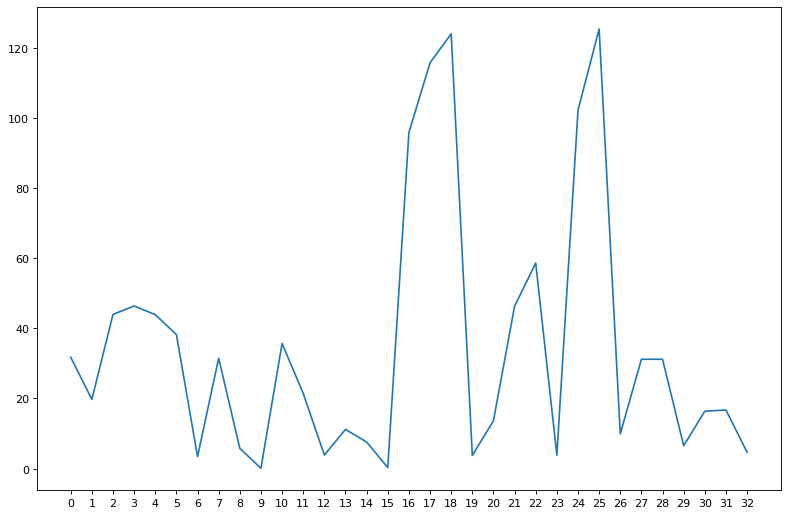

In [9]:
scores=selector_scores_all()

In [10]:
scores_dict=scores_to_dict(x.columns,scores)
for k,v in scores_dict.items():
    print("{}: {}".format(k,v))

n_atoms_without_Hydrogen: 31.72479977691589
n_atoms_with_Hydrogen: 19.718134745970797
m_weight: 43.94253867873949
m_avg_weigth: 46.33532806802201
m_weigth_without_Hydrogen: 43.86746578791417
n_valence_electrons: 38.19101253107733
n_aliphatic_carbocycles: 3.4115081356316312
n_aliphatic_heterocycles: 31.4565595502892
n_aliphatic_rings: 5.758756788231769
n_amide_bonds: 0.07656685966290797
n_aromatic_carbocycles: 35.66120111883486
n_aromatic_heterocycles: 21.401540019270062
n_aromatic_rings: 3.8477785742883728
n_saturated_carbocycles: 11.15796504377962
n_saturated_heterocycles: 7.5567483759722895
n_saturated_rings: 0.26387222533811144
n_HBA: 95.79126647686563
n_HBD: 115.68202399926876
n_hetero_atoms: 123.93330752196007
n_hetero_cycles: 3.733933382040554
n_rings: 13.620146549896782
n_strict_rotable_bonds: 46.27534556260187
n_non_strict_rotable_bonds: 58.573996755642746
n_primary_carbon_atoms: 3.8047991953591973
n_HOH: 102.1479134664739
n_O: 125.31991939223073
n_briged_head_atoms: 9.89599413

In [11]:
max_weight_label=max(scores_dict.items(), key=operator.itemgetter(1))[0]
max_weight=max(scores_dict.items(), key=operator.itemgetter(1))[1];

print("max weigth {} = {}".format(max_weight_label,max_weight))

min_weight_label=min(scores_dict.items(), key=operator.itemgetter(1))[0]
min_weight=min(scores_dict.items(), key=operator.itemgetter(1))[1];

print("min weigth {} = {}".format(min_weight_label,min_weight))

total_weigth = sum(scores)
print("total weigth = {}".format(total_weigth))

avrg_weigth = statistics.mean(scores); avrg_weigth 
print("average weight = {}".format(avrg_weigth))

max weigth n_O = 125.31991939223073
min weigth n_amide_bonds = 0.07656685966290797
total weigth = 1149.6589324603076
average weight = 34.838149468494166


# Separate weights depepending on a threshold

e_features: n_atoms_without_Hydrogen, n_O, n_HOH, n_HBA, n_HBD, m_logp, m_mr

m_features: where weigth >= max_weight - avrg_weigth
p_features: where weigth >= avrg_weigth and weight < max_weight - avrg_weigth
o_features: whatever is left from the other's thresholds

In [12]:
def remove_key(d:dict, k):
    try:
        del d[k]
    except KeyError:
        print("Key 'testing' not found")
    return d

In [13]:
def remove_k_v_dict(d:dict,lst:list):
    for i in lst:
        d=remove_key(d,i) 
    return d

In [14]:
def get_df_with_name_and_prediction(df,true_prediction,big_df):
    new_df=df
    new_df.insert(0,"m_name",big_df["m_name"].values)
    new_df=new_df.join(true_prediction)
    
    return new_df

In [15]:
def get_new_df(features:list,data=x,true_prediction=y,big_df=mixed_df):
    
    def get_indexes(selection=features,df=data): 
        index_list=df.columns.get_indexer(selection)
        return index_list
    
    index_list=get_indexes()
    new_df=data.iloc[:, index_list]
    new_df=get_df_with_name_and_prediction(new_df,true_prediction,big_df)
       
    return new_df

# e_features

In [16]:
histocial_features=["n_atoms_without_Hydrogen", "n_O", "n_HOH", "n_HBA", "n_HBD", "m_logp", "m_mr"]
e_features={}
for k,v in scores_dict.items():
    if k in histocial_features:
        e_features[k]=v

e_features

{'n_atoms_without_Hydrogen': 31.72479977691589,
 'n_HBA': 95.79126647686563,
 'n_HBD': 115.68202399926876,
 'n_HOH': 102.1479134664739,
 'n_O': 125.31991939223073,
 'm_logp': 16.345069851791834,
 'm_mr': 16.687681665603243}

In [17]:
e_features_index_list=data_frame.columns.get_indexer(histocial_features)
e_df=x.iloc[:, e_features_index_list]
e_df.insert(0,"m_name",mixed_df["m_name"].values)
e_df=e_df.join(y)

In [18]:
save_df_to_disk(e_df,root_path+"\e_molecules.csv")

In [19]:
scores_dict=remove_k_v_dict(scores_dict,histocial_features)

# m_features

In [20]:
selected_features = []
m_features = {}
for k,v in scores_dict.items():
    if v >= max_weight - avrg_weigth:
        m_features[k]=v
        selected_features.append(k)

m_features

{'n_hetero_atoms': 123.93330752196007}

In [21]:
scores_dict=remove_k_v_dict(scores_dict,selected_features)

# p_features

In [22]:
selected_features = []
p_features = {}
for k,v in scores_dict.items():
    if ((v < max_weight - avrg_weigth) and (v >= avrg_weigth)):
        p_features[k]=v
        selected_features.append(k)

p_features

{'m_weight': 43.94253867873949,
 'm_avg_weigth': 46.33532806802201,
 'm_weigth_without_Hydrogen': 43.86746578791417,
 'n_valence_electrons': 38.19101253107733,
 'n_aromatic_carbocycles': 35.66120111883486,
 'n_strict_rotable_bonds': 46.27534556260187,
 'n_non_strict_rotable_bonds': 58.573996755642746}

In [23]:
scores_dict=remove_k_v_dict(scores_dict,selected_features)

# o_features

A model using n_valence_electrons, n_aromatic_carbocycles, n_atoms_stereo_centers and n_atoms_unspecified_stereo_centers
should be tested if possible

In [24]:
o_features=scores_dict; o_features

{'n_atoms_with_Hydrogen': 19.718134745970797,
 'n_aliphatic_carbocycles': 3.4115081356316312,
 'n_aliphatic_heterocycles': 31.4565595502892,
 'n_aliphatic_rings': 5.758756788231769,
 'n_amide_bonds': 0.07656685966290797,
 'n_aromatic_heterocycles': 21.401540019270062,
 'n_aromatic_rings': 3.8477785742883728,
 'n_saturated_carbocycles': 11.15796504377962,
 'n_saturated_heterocycles': 7.5567483759722895,
 'n_saturated_rings': 0.26387222533811144,
 'n_hetero_cycles': 3.733933382040554,
 'n_rings': 13.620146549896782,
 'n_primary_carbon_atoms': 3.8047991953591973,
 'n_briged_head_atoms': 9.89599413526781,
 'n_atoms_stereo_centers': 31.154289329368947,
 'n_atoms_unspecified_stereo_centers': 31.154289329368947,
 'n_spiro_atoms': 6.5157255438327795,
 'fraction_CSP3': 4.65145402279527}

# e_features + m_features

In [25]:
em_features_lst=[k for k in e_features.keys()]+[k for k in m_features.keys()]
em_df=get_new_df(em_features_lst); em_df.head()

,m_name,n_atoms_without_Hydrogen,n_HBA,n_HBD,n_HOH,n_O,m_logp,m_mr,n_hetero_atoms,is_cns_molecule
0,BUMETANIDE,25,5,3,4,7,3.0365,94.6882,8,0
1,BACLOFEN,14,2,2,3,3,1.8570,55.5002,4,1
2,METYRAPONE,17,3,0,0,3,2.6371,65.8305,3,0
3,METHYLPHENOBARBITAL,18,3,1,1,5,1.0426,64.7197,5,1
4,DULOXETINE,21,3,1,1,2,4.6309,90.1797,3,1


In [26]:
save_df_to_disk(em_df,"f_classif_em_molecules.csv")

# e_features + m_features+p_features

In [27]:
emp_features_lst=[k for k in e_features.keys()]+[k for k in m_features.keys()]+[k for k in p_features.keys()]
emp_df=get_new_df(emp_features_lst); emp_df.head()

,m_name,n_atoms_without_Hydrogen,n_HBA,n_HBD,n_HOH,n_O,m_logp,m_mr,n_hetero_atoms,m_weight,m_avg_weigth,m_weigth_without_Hydrogen,n_valence_electrons,n_aromatic_carbocycles,n_strict_rotable_bonds,n_non_strict_rotable_bonds,is_cns_molecule
0,BUMETANIDE,25,5,3,4,7,3.0365,94.6882,8,364.109293,344.263,364.423,134,2,8,8,0
1,BACLOFEN,14,2,2,3,3,1.8570,55.5002,4,213.055656,201.568,213.664,76,1,4,4,1
2,METYRAPONE,17,3,0,0,3,2.6371,65.8305,3,226.110613,212.167,226.279,86,0,3,3,0
3,METHYLPHENOBARBITAL,18,3,1,1,5,1.0426,64.7197,5,246.100442,232.154,246.266,94,1,2,2,1
4,DULOXETINE,21,3,1,1,2,4.6309,90.1797,3,297.118735,278.271,297.423,108,2,6,6,1


In [28]:
save_df_to_disk(emp_df,"f_classif_emp_molecules.csv")

# Features, from k=1 to k=all-1

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC

In [30]:
def selector_scores(selection_type,best_k,
                    data,true_prediction):
    
    selector = SelectKBest(selection_type, k=best_k)
    selector.fit(data,true_prediction)
    new_data=selector.transform(data)
    labels=list(data.columns[selector.get_support(indices=True)])
    new_df=pd.DataFrame(new_data,columns=labels)
    
    return new_df

In [31]:
def get_data_from_1_to_k_features(selection_type,best_k_limit,data,true_prediction):        
    data_lst=[]
    for i in range(1,best_k_limit+1):
        new_df=selector_scores(selection_type,i,data,true_prediction)
        data_lst.append(new_df)
        
    return data_lst

In [32]:
def get_best_model_index(data_lst,true_prediction,model):
    
    def get_roc_auc_result(data,true_prediction,model):
        cv_results = cross_validate(clf, data, true_prediction, cv=10,scoring=('roc_auc'))
        roc_auc_avrg=cv_results['test_score'].mean()
        
        return roc_auc_avrg    
    
    model_results_lst=[]
    for i,data in enumerate(data_lst):
        actual_data=data
        roc_auc_avrg=get_roc_auc_result(actual_data,true_prediction,model)
        print("Model #{} roc auc result = {}%".format(i,roc_auc_avrg*100))
        model_results_lst.append(roc_auc_avrg)
    
    max_value = max(model_results_lst)
    index=[i for i, j in enumerate(model_results_lst) if j == max_value]
    print("\nBest model roc auc = {}%".format(max_value*100))
    
    return index

In [33]:
clf = LinearSVC(random_state=0, tol=1e-5, dual=False)

In [34]:
data_lst=get_data_from_1_to_k_features(f_classif,len(x.columns)-1,x,y)

In [35]:
best_model_index=get_best_model_index(data_lst,y,clf)

Model #0 roc auc result = 73.98033603182863%
Model #1 roc auc result = 74.08654670027913%
Model #2 roc auc result = 78.98088574442957%
Model #3 roc auc result = 78.98383173942486%
Model #4 roc auc result = 78.92822818079712%
Model #5 roc auc result = 79.82130985415326%
Model #6 roc auc result = 79.71051050493038%
Model #7 roc auc result = 79.68360297639695%
Model #8 roc auc result = 79.55606965297392%
Model #9 roc auc result = 79.76394618287829%
Model #10 roc auc result = 79.63192483028591%
Model #11 roc auc result = 82.15503082519862%
Model #12 roc auc result = 82.39281894686421%
Model #13 roc auc result = 86.97657553309219%
Model #14 roc auc result = 86.91039581371918%
Model #15 roc auc result = 86.91559872735081%
Model #16 roc auc result = 86.75509555192177%
Model #17 roc auc result = 86.78038233156599%
Model #18 roc auc result = 86.81141915663248%
Model #19 roc auc result = 87.10561863056012%
Model #20 roc auc result = 87.16512953603225%
Model #21 roc auc result = 87.68309558908544

In [36]:
best_model_index

[23]

In [37]:
for i in best_model_index:
   display(data_lst[i].head())          

,n_atoms_without_Hydrogen,n_atoms_with_Hydrogen,m_weight,m_avg_weigth,m_weigth_without_Hydrogen,n_valence_electrons,n_aliphatic_heterocycles,n_aromatic_carbocycles,n_aromatic_heterocycles,n_saturated_carbocycles,...,n_rings,n_strict_rotable_bonds,n_non_strict_rotable_bonds,n_HOH,n_O,n_briged_head_atoms,n_atoms_stereo_centers,n_atoms_unspecified_stereo_centers,m_logp,m_mr
0,25.0,45.0,364.109293,344.263,364.423,134.0,0.0,2.0,0.0,0.0,...,2.0,8.0,8.0,4.0,7.0,0.0,0.0,0.0,3.0365,94.6882
1,14.0,26.0,213.055656,201.568,213.664,76.0,0.0,1.0,0.0,0.0,...,1.0,4.0,4.0,3.0,3.0,0.0,1.0,1.0,1.8570,55.5002
2,17.0,31.0,226.110613,212.167,226.279,86.0,0.0,0.0,2.0,0.0,...,2.0,3.0,3.0,0.0,3.0,0.0,0.0,0.0,2.6371,65.8305
3,18.0,32.0,246.100442,232.154,246.266,94.0,1.0,1.0,0.0,0.0,...,2.0,2.0,2.0,1.0,5.0,0.0,1.0,1.0,1.0426,64.7197
4,21.0,40.0,297.118735,278.271,297.423,108.0,0.0,2.0,1.0,0.0,...,3.0,6.0,6.0,1.0,2.0,0.0,1.0,1.0,4.6309,90.1797


In [38]:
best_df=get_df_with_name_and_prediction(data_lst[best_model_index[0]],y,mixed_df); best_df.head()

,m_name,n_atoms_without_Hydrogen,n_atoms_with_Hydrogen,m_weight,m_avg_weigth,m_weigth_without_Hydrogen,n_valence_electrons,n_aliphatic_heterocycles,n_aromatic_carbocycles,n_aromatic_heterocycles,...,n_strict_rotable_bonds,n_non_strict_rotable_bonds,n_HOH,n_O,n_briged_head_atoms,n_atoms_stereo_centers,n_atoms_unspecified_stereo_centers,m_logp,m_mr,is_cns_molecule
0,BUMETANIDE,25.0,45.0,364.109293,344.263,364.423,134.0,0.0,2.0,0.0,...,8.0,8.0,4.0,7.0,0.0,0.0,0.0,3.0365,94.6882,0
1,BACLOFEN,14.0,26.0,213.055656,201.568,213.664,76.0,0.0,1.0,0.0,...,4.0,4.0,3.0,3.0,0.0,1.0,1.0,1.8570,55.5002,1
2,METYRAPONE,17.0,31.0,226.110613,212.167,226.279,86.0,0.0,0.0,2.0,...,3.0,3.0,0.0,3.0,0.0,0.0,0.0,2.6371,65.8305,0
3,METHYLPHENOBARBITAL,18.0,32.0,246.100442,232.154,246.266,94.0,1.0,1.0,0.0,...,2.0,2.0,1.0,5.0,0.0,1.0,1.0,1.0426,64.7197,1
4,DULOXETINE,21.0,40.0,297.118735,278.271,297.423,108.0,0.0,2.0,1.0,...,6.0,6.0,1.0,2.0,0.0,1.0,1.0,4.6309,90.1797,1


In [39]:
save_df_to_disk(best_df,"f_classif_best.csv")